In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("financial_data.csv")

In [4]:
df.describe()

,Total Equity,CF to RWA,NPL to TL,TLLP to TNLP,Base Rate,ROE
count,2.500000e+01,24.000000,24.000000,24.000000,24.000000,24.000000
mean,4.417542e+09,14.878333,1.170417,179.902500,10.617333,12.184167
std,9.701197e+08,1.766957,0.881054,62.519829,1.219594,3.406869
min,2.907000e+09,12.540000,0.580000,88.670000,8.416000,1.220000
25%,3.589000e+09,13.215000,0.742500,144.305000,10.085000,12.492500
50%,4.415732e+09,14.805000,0.825000,161.825000,10.865000,13.145000
75%,5.349425e+09,16.325000,1.017500,207.695000,11.232500,13.927500
max,5.764807e+09,18.450000,3.890000,315.570000,12.760000,15.850000


In [5]:
df.isnull().sum()

Date            0
Total Equity    0
CF to RWA       1
NPL to TL       1
TLLP to TNLP    1
Base Rate       1
ROE             1
dtype: int64

In [10]:
df

,Date,Total Equity,CF to RWA,NPL to TL,TLLP to TNLP,Base Rate,ROE
0,2080-01-10,5617881116,12.540,3.890,88.670,12.660,4.790
1,2079-10-08,5762885709,12.770,3.520,95.120,12.760,1.220
2,2079-07-07,5764807422,12.960,2.500,101.060,12.110,6.950
3,2079-04-21,5664709083,13.300,1.420,150.660,11.130,12.380
4,2079-01-07,5487952816,14.960,1.370,154.650,10.160,12.530
5,2078-10-07,5349425375,14.810,1.470,145.440,9.230,12.860
6,2078-07-15,5497003069,14.680,0.680,267.970,8.416,15.850
7,2078-04-30,5326570764,12.830,0.800,229.400,8.420,13.920
8,2078-01-09,5133955556,12.680,0.580,261.900,8.570,15.650
9,2077-10-14,4872162356,13.510,0.680,232.220,8.820,12.540


In [11]:
#set date as index
df.set_index("Date",inplace=True)

In [12]:
df.sample()

,Total Equity,CF to RWA,NPL to TL,TLLP to TNLP,Base Rate,ROE
Date,,,,,,
2074-07-07,3124000000,15.3,0.78,140.9,10.63,13.95


In [15]:
#dealing with missing values
df_median = df.fillna(df.median(numeric_only=True))

In [16]:
df_median

,Total Equity,CF to RWA,NPL to TL,TLLP to TNLP,Base Rate,ROE
Date,,,,,,
2080-01-10,5617881116,12.540,3.890,88.670,12.660,4.790
2079-10-08,5762885709,12.770,3.520,95.120,12.760,1.220
2079-07-07,5764807422,12.960,2.500,101.060,12.110,6.950
2079-04-21,5664709083,13.300,1.420,150.660,11.130,12.380
2079-01-07,5487952816,14.960,1.370,154.650,10.160,12.530
2078-10-07,5349425375,14.810,1.470,145.440,9.230,12.860
2078-07-15,5497003069,14.680,0.680,267.970,8.416,15.850
2078-04-30,5326570764,12.830,0.800,229.400,8.420,13.920
2078-01-09,5133955556,12.680,0.580,261.900,8.570,15.650


In [17]:
df_median.isnull().sum()

Total Equity    0
CF to RWA       0
NPL to TL       0
TLLP to TNLP    0
Base Rate       0
ROE             0
dtype: int64

In [18]:
#fill na with mean
df_mean = df.fillna(df.mean(numeric_only=True))

In [20]:
df_mean.isnull().sum()

Total Equity    0
CF to RWA       0
NPL to TL       0
TLLP to TNLP    0
Base Rate       0
ROE             0
dtype: int64

In [22]:
df.columns

Index(['Total Equity', 'CF to RWA', 'NPL to TL', 'TLLP to TNLP', 'Base Rate',
       'ROE'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

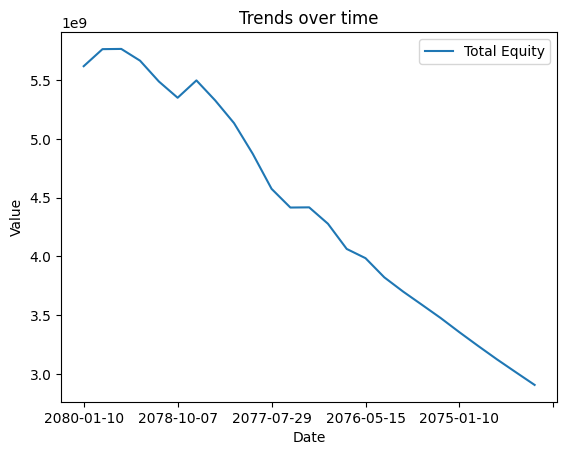

In [24]:
#Line plot for key financial indicators
plt.figure(figsize=(12,6))
df_mean[['Total Equity']].plot(title="Trends over time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


<Axes: xlabel='Date'>

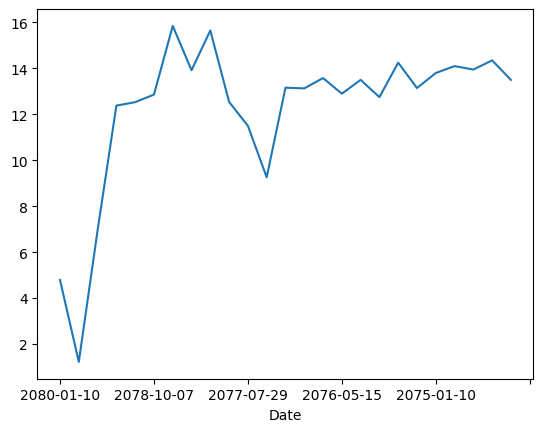

In [25]:
df['ROE'].plot()

In [26]:
#correlation analysis
df_mean.corr()

,Total Equity,CF to RWA,NPL to TL,TLLP to TNLP,Base Rate,ROE
Total Equity,1.000000,-0.636467,0.554523,0.084880,-0.103644,-0.480633
CF to RWA,-0.636467,1.000000,-0.421236,-0.141475,0.191646,0.450188
NPL to TL,0.554523,-0.421236,1.000000,-0.602853,0.604461,-0.888035
TLLP to TNLP,0.084880,-0.141475,-0.602853,1.000000,-0.636537,0.371533
Base Rate,-0.103644,0.191646,0.604461,-0.636537,1.000000,-0.635364
ROE,-0.480633,0.450188,-0.888035,0.371533,-0.635364,1.000000


In [29]:
df.corr().style.background_gradient(cmap='coolwarm')

,Total Equity,CF to RWA,NPL to TL,TLLP to TNLP,Base Rate,ROE
Total Equity,1.000000,-0.636467,0.554523,0.084880,-0.103644,-0.480633
CF to RWA,-0.636467,1.000000,-0.421236,-0.141475,0.191646,0.450188
NPL to TL,0.554523,-0.421236,1.000000,-0.602853,0.604461,-0.888035
TLLP to TNLP,0.084880,-0.141475,-0.602853,1.000000,-0.636537,0.371533
Base Rate,-0.103644,0.191646,0.604461,-0.636537,1.000000,-0.635364
ROE,-0.480633,0.450188,-0.888035,0.371533,-0.635364,1.000000


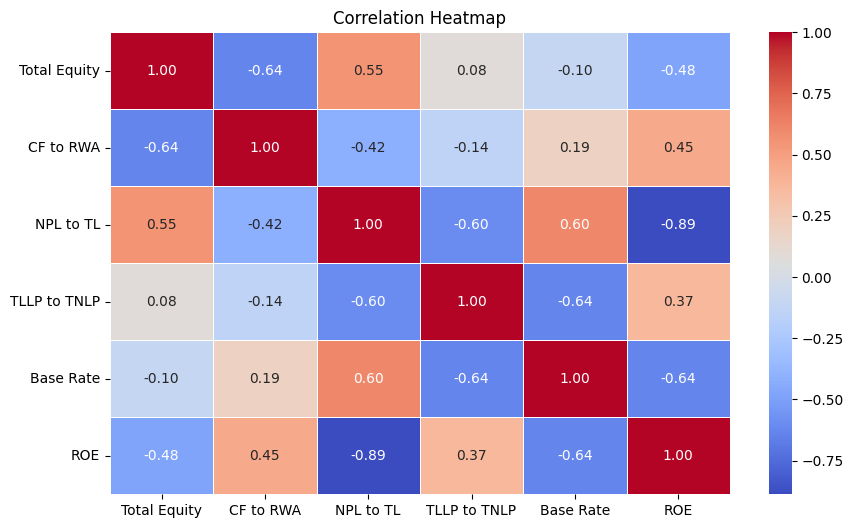

In [30]:
#using sns
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

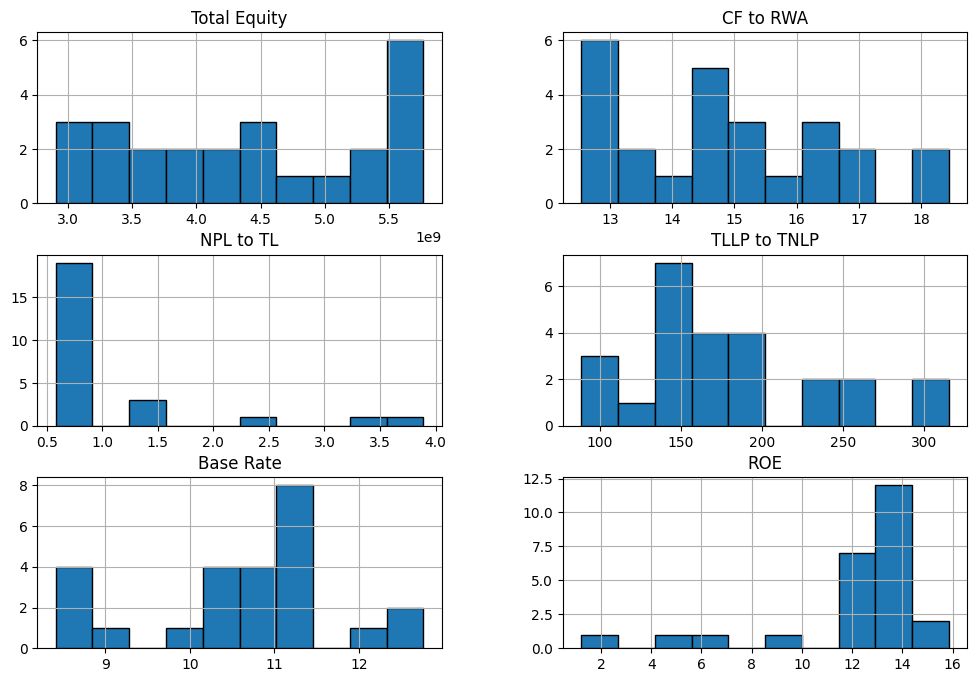

In [34]:
#distrribution of key features
df.hist(figsize=(12,8),bins=10,edgecolor="black")
plt.show()

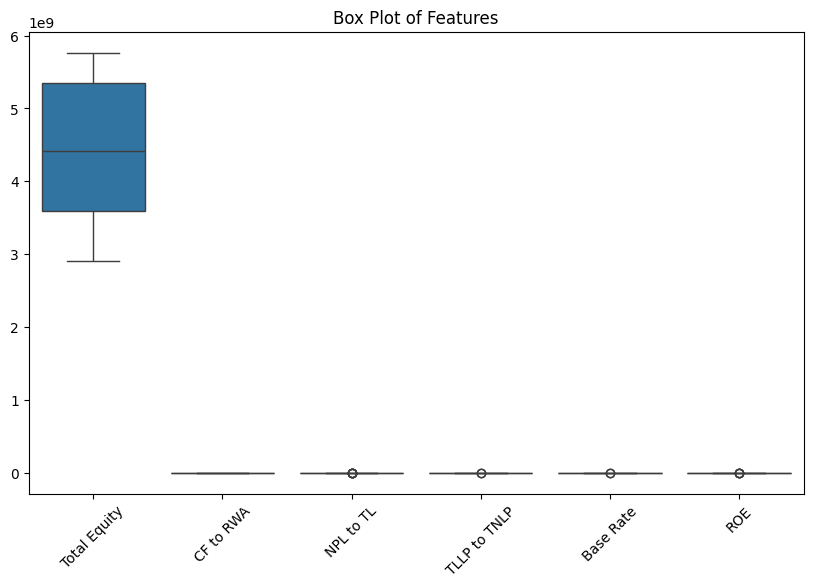

In [35]:
#Box plot to detect outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Box Plot of Features")
plt.show()

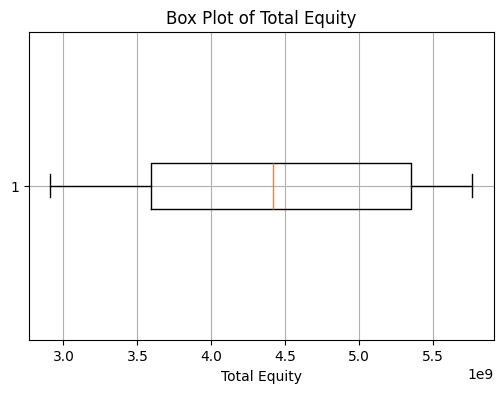

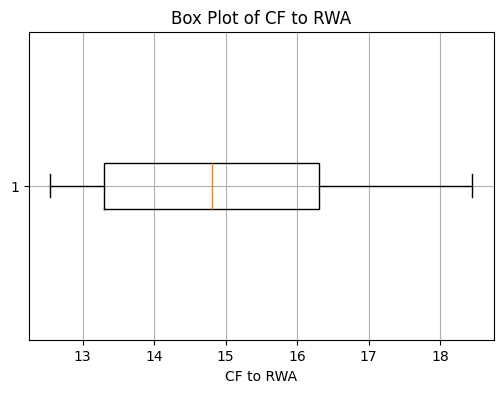

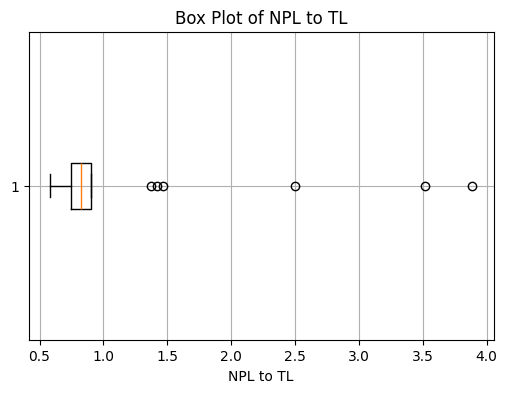

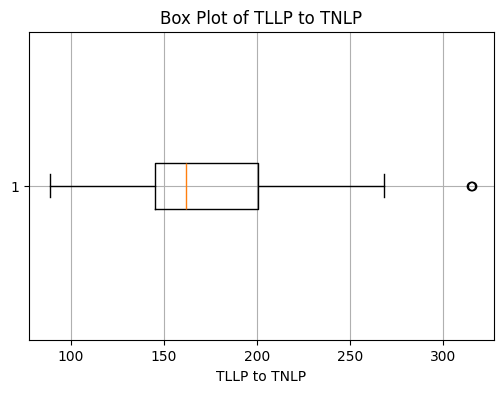

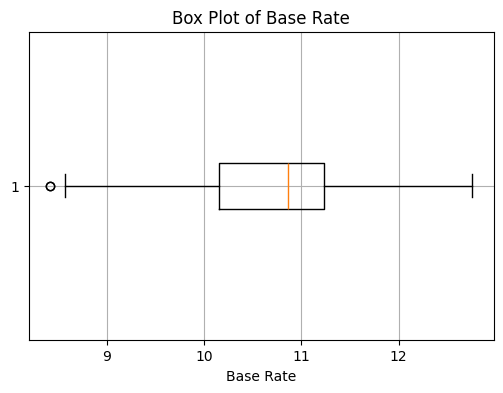

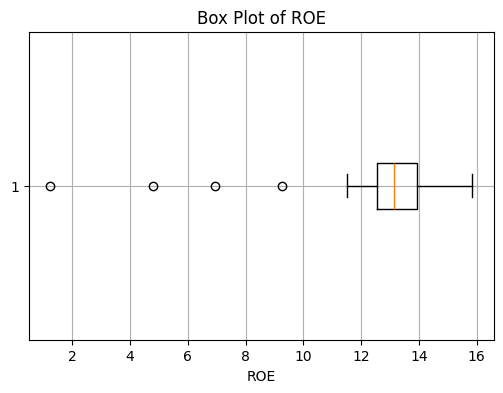

In [36]:
for column in df.columns:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[column],vert=False)
    plt.title(f"Box Plot of {column}")
    plt.xlabel(column)
    plt.grid()
    plt.show()

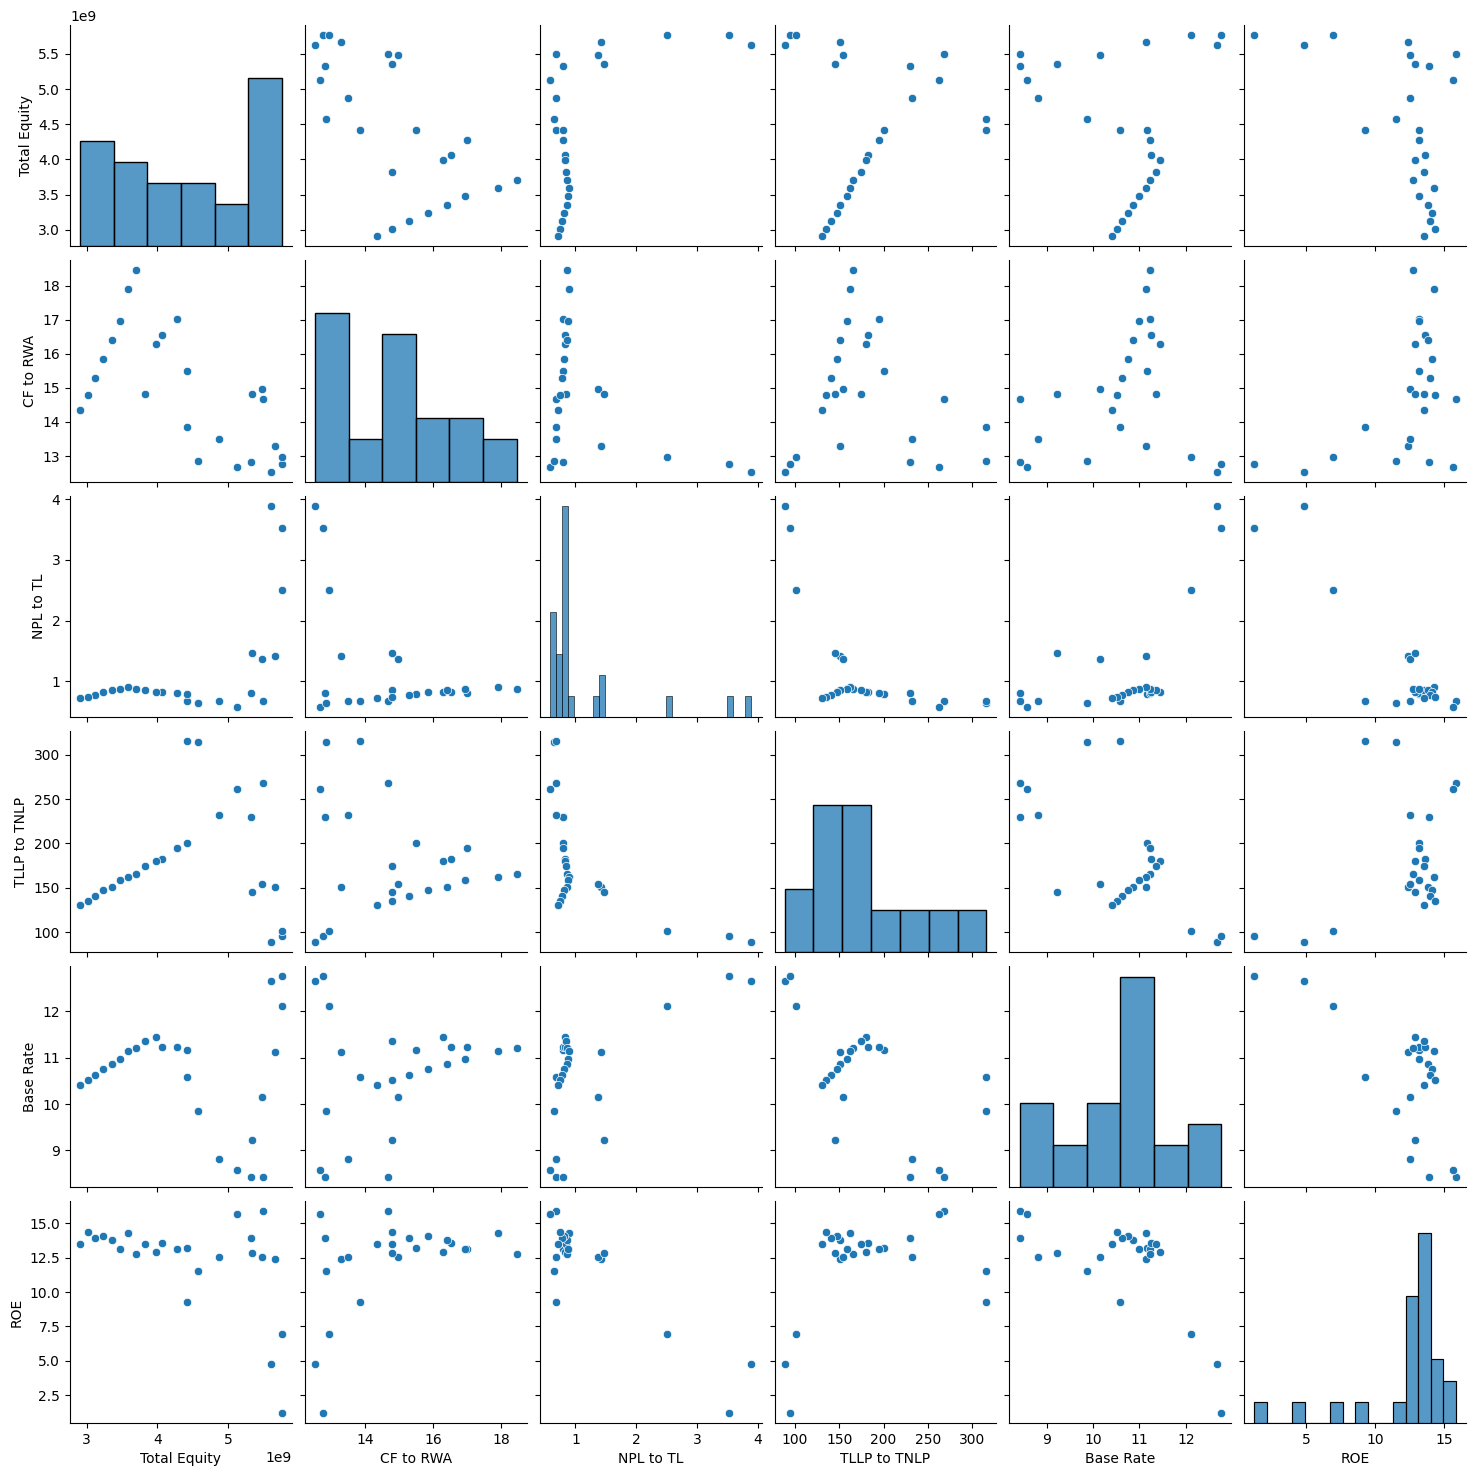

In [37]:
sns.pairplot(df)

In [38]:
#Function to detect outliers using IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    #Create a boolean mask for outliers
    outlier_mask = (df<lower_bound)|(df>upper_bound)
    
    #filter only rows that have at least one outlier
    outliers_df = df[outlier_mask.any(axis=1)].copy()
    
    #mark outlier values
    for col in df.columns:
        outliers_df[col] = outliers_df[col].where(outlier_mask[col])
        
    return outliers_df

In [39]:
outliers_df = detect_outliers_iqr(df)
outliers_df

,Total Equity,CF to RWA,NPL to TL,TLLP to TNLP,Base Rate,ROE
Date,,,,,,
2080-01-10,NaN,NaN,3.89,NaN,NaN,4.79
2079-10-08,NaN,NaN,3.52,NaN,NaN,1.22
2079-07-07,NaN,NaN,2.50,NaN,NaN,6.95
2079-04-21,NaN,NaN,1.42,NaN,NaN,NaN
2079-01-07,NaN,NaN,1.37,NaN,NaN,NaN
2078-10-07,NaN,NaN,1.47,NaN,NaN,NaN
2078-07-15,NaN,NaN,NaN,NaN,8.416,NaN
2078-04-30,NaN,NaN,NaN,NaN,8.420,NaN
2077-07-29,NaN,NaN,NaN,314.87,NaN,NaN


In [43]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [44]:
df_cleaned = df.dropna()

In [45]:
#Define target (ROE) and features (All except ROE)
X = df_cleaned.drop(columns=["ROE"])
y = df_cleaned["ROE"]

In [46]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
#Forward selection function
def forward_selection(X,y,significance_level=0.05):
    initial_features = list(X.columns)
    selected_features = []
    
    while len(initial_features)>0:
        best_pval = significance_level
        best_feature = None
        
        for feature in initial_features:
            model = sm.OLS(y,sm.add_constant(pd.DataFrame(X[selected_features+[feature]]))).fit()
            pval = model.pvalues[feature]
            
            if pval < best_pval:
                best_pval = pval
                best_feature = feature
                
        if best_feature is not None:
            selected_features.append(best_feature)
            initial_features.remove(best_feature)
            
        else:
            break
        
    return selected_features
            

In [48]:
selected_features = forward_selection(X_train,y_train)

In [49]:
selected_features

['NPL to TL']

In [50]:
#Train final model with selected features
final_model = sm.OLS(y_train,sm.add_constant(X_train[selected_features])).fit()

In [51]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ROE   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     115.7
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           2.88e-09
Time:                        18:36:19   Log-Likelihood:                -30.589
No. Observations:                  20   AIC:                             65.18
Df Residuals:                      18   BIC:                             67.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9225      0.496     34.117      0.000      15.880      17.965
NPL to TL     -4.0801      0.379    -10.756      0.000      -4.877      -3.283
==============================================================================
Omnibus:                        1.435   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                0.601
Skew:                          -0.420   Prob(JB):                        0.740
Kurtosis:                       3.131   Cond. No.                         3.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
X_test[selected_features]

,NPL to TL
Date,
2078-01-09,0.58
2076-02-28,0.85
2080-01-10,3.89
2074-04-12,0.75
2077-04-21,0.68


In [ ]:
predictions = final_model.predict(sm.add_constant(X_test[selected_features]))

In [55]:
predictions

Date
2078-01-09    14.556074
2076-02-28    13.454441
2080-01-10     1.050873
2074-04-12    13.862453
2077-04-21    14.148062
dtype: float64

In [56]:
y_test

Date
2078-01-09    15.65
2076-02-28    13.50
2080-01-10     4.79
2074-04-12    14.35
2077-04-21     9.26
Name: ROE, dtype: float64

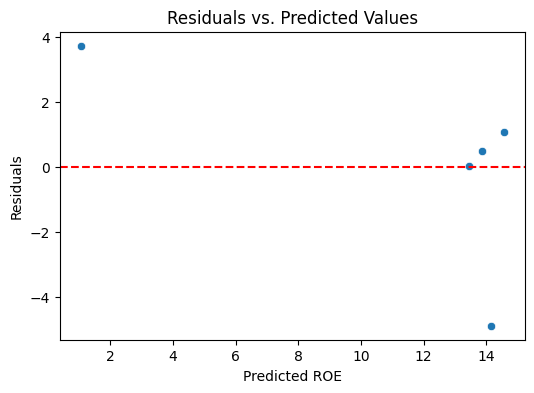

In [57]:
# Calculate Residuals
residuals = y_test - predictions

## 1️⃣ Residuals vs. Predicted Values (Check Linearity & Homoscedasticity)
plt.figure(figsize=(6,4))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted ROE")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

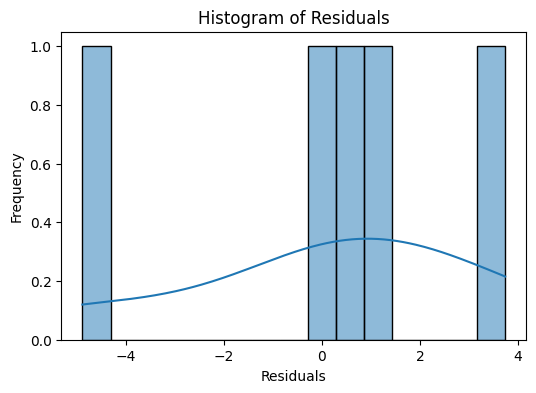

In [58]:
## 2️⃣ Histogram of Residuals (Check Normality)
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, bins=15)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

In [60]:
import scipy.stats as stats

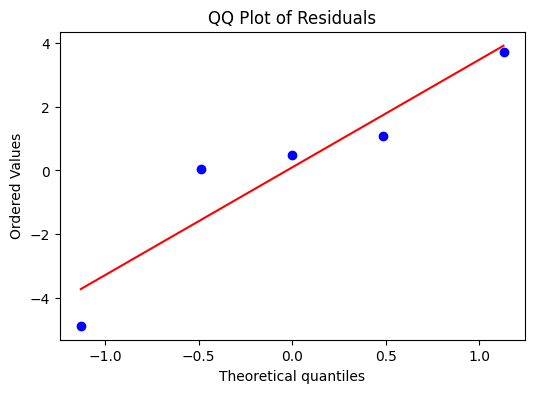

In [61]:
## 3️⃣ QQ Plot (Check Normality)
plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.show()